<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220519.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표 
* regression
* PCA

In [9]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, time, date, timezone, timedelta
import sklearn.datasets as skd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import plotnine as gg
from plotnine import ggplot, aes
import plotnine.data as ptd

# regression

In [14]:
raw = dict(zip(sns.get_dataset_names(), [sns.load_dataset(a) for a in sns.get_dataset_names()]))
raw.keys()

dict_keys(['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic'])

In [23]:
raw = skd.load_wine()
raw.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [25]:
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']

In [29]:
x.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [30]:
x.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [49]:
x_ = x.assign(wow = 1)
x_.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wow
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


In [51]:
x_ = pd.melt(x_, id_vars = 'wow')
x_.head()

,wow,variable,value
0,1,alcohol,14.23
1,1,alcohol,13.20
2,1,alcohol,13.16
3,1,alcohol,14.37
4,1,alcohol,13.24


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


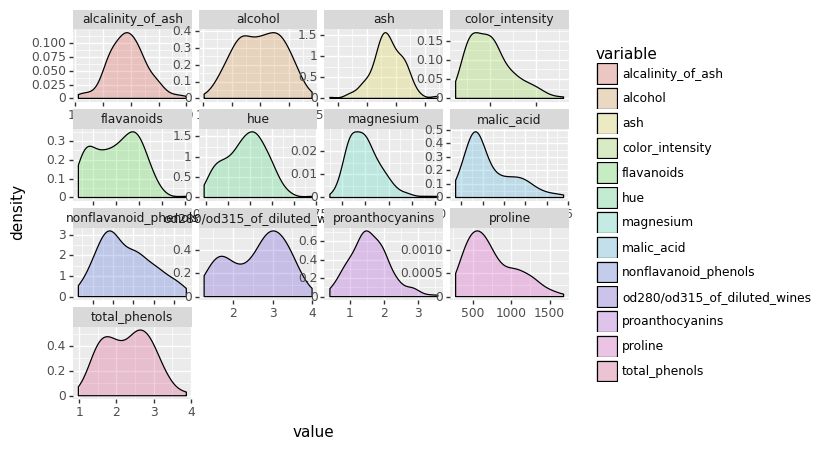

<ggplot: (8734672005129)>

In [53]:
(
    ggplot(x_, aes('value', fill = 'variable')) +
    gg.geom_density(alpha = .3) +
    gg.facet_wrap('~variable', scales = 'free')
)

In [59]:
x_cor = x.corr()

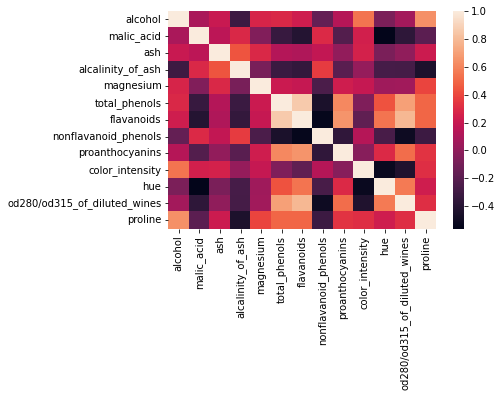

In [62]:
sns.heatmap(x_cor)

In [63]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [67]:
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)
proba_rf = fit_rf.predict_proba(x_te)

In [69]:
accuracy_score(y_tr, fit_rf.predict(x_tr)), accuracy_score(y_te, pred_rf)

(1.0, 1.0)

# PCA

In [75]:
d1 = ptd.mtcars
d1.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [77]:
d1_ = StandardScaler().fit_transform(d1.drop('name', axis = 1))

In [78]:
pca = PCA(n_components = 10)

In [80]:
fit_pca = pca.fit_transform(d1_)

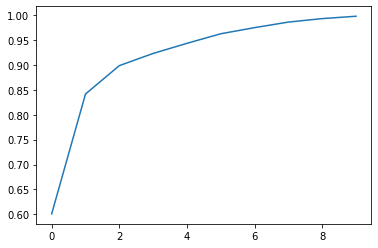

In [86]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [97]:
d2 = pd.DataFrame(np.c_[d1['name'].values.reshape(-1,1), fit_pca], columns = ['name'] + [f'pc{a}' for a in range(1,11)])
d2.head()

,name,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,Mazda RX4,0.657213,1.735446,-0.601199,0.115522,-0.960653,-0.017259,-0.433311,0.009785,-0.148766,-0.067771
1,Mazda RX4 Wag,0.629396,1.550033,-0.382322,0.202307,-1.032949,-0.245592,-0.42286,0.085873,-0.075721,-0.128959
2,Datsun 710,2.779397,-0.146457,-0.241238,-0.249139,0.405143,-0.354348,-0.618584,-0.59462,0.133328,0.04647
3,Hornet 4 Drive,0.311771,-2.363019,-0.135759,-0.511862,0.557997,0.019606,-0.041007,0.050376,-0.223742,-0.061366
4,Hornet Sportabout,-1.974489,-0.754402,-1.134402,0.075653,0.210836,0.15158,0.389645,0.162863,0.021515,-0.060787


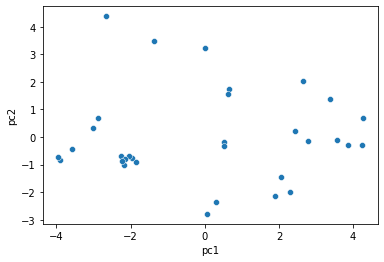

In [102]:
sns.scatterplot(data = d2, x = 'pc1', y = 'pc2')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


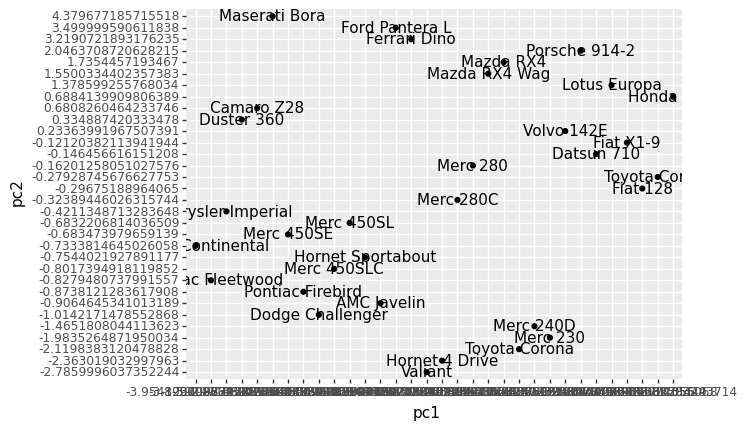

<ggplot: (8734666667261)>

In [109]:
(
    ggplot(d2, aes('pc1', 'pc2')) +
    gg.geom_point() +
    gg.geom_text(aes(label = 'name'))
)